In [1]:
import json
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [2]:
df_game_events = pd.read_csv('all_game_events.csv')
df_game_events

,season,game time,period,period time,game id,home team,away team,goal,team shot,goal_home_coordinates,coordinates,shooter,goalie,shot type,empty net,strength,home goal,away goal,rebound,shot distance
0,2016,2017-04-12T23:00:00Z,1,00:16,2016030111,MTL,NYR,False,Montréal Canadiens,"[89, 0]","[-8.0, -36.0]",Dwight King,Henrik Lundqvist,Wrist Shot,NaN,NaN,0,0,False,88.639720
1,2016,2017-04-12T23:00:00Z,1,01:56,2016030111,MTL,NYR,False,New York Rangers,"[89, 0]","[85.0, -6.0]",Rick Nash,Carey Price,Wrist Shot,NaN,NaN,0,0,False,7.211103
2,2016,2017-04-12T23:00:00Z,1,02:04,2016030111,MTL,NYR,False,Montréal Canadiens,"[89, 0]","[-69.0, -35.0]",Max Pacioretty,Henrik Lundqvist,Wrist Shot,NaN,NaN,0,0,False,40.311289
3,2016,2017-04-12T23:00:00Z,1,03:40,2016030111,MTL,NYR,False,Montréal Canadiens,"[89, 0]","[-55.0, -17.0]",Dwight King,Henrik Lundqvist,Slap Shot,NaN,NaN,0,0,False,38.013156
4,2016,2017-04-12T23:00:00Z,1,04:56,2016030111,MTL,NYR,False,Montréal Canadiens,"[89, 0]","[-58.0, -28.0]",Paul Byron,Henrik Lundqvist,Wrist Shot,NaN,NaN,0,0,False,41.773197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361216,2020,2021-05-09T02:30:00Z,3,19:57,2020020868,SJS,ARI,False,San Jose Sharks,"[89, 0]","[71.0, -16.0]",Noah Gregor,Adin Hill,Backhand,NaN,NaN,4,4,False,24.083189
361217,2020,2021-05-09T02:30:00Z,4,00:33,2020020868,SJS,ARI,False,San Jose Sharks,"[-89, 0]","[-68.0, -14.0]",Erik Karlsson,Adin Hill,Wrist Shot,NaN,NaN,4,4,False,25.238859
361218,2020,2021-05-09T02:30:00Z,4,00:57,2020020868,SJS,ARI,False,Arizona Coyotes,"[-89, 0]","[56.0, 11.0]",Conor Garland,Alexei Melnichuk,Wrist Shot,NaN,NaN,4,4,False,34.785054
361219,2020,2021-05-09T02:30:00Z,4,01:46,2020020868,SJS,ARI,False,Arizona Coyotes,"[-89, 0]","[73.0, 6.0]",Conor Garland,Alexei Melnichuk,Wrist Shot,NaN,NaN,4,4,False,17.088007


event type,Shot,Goal,Total Shots,Success Rate
shot type,,,,
Wrap-around,3275,258,3533,0.073026
Deflected,5069,1032,6101,0.169153
Tip-In,15446,3242,18688,0.173480
Backhand,25705,3362,29067,0.115664
Snap Shot,47166,5133,52299,0.098147
Slap Shot,51886,3569,55455,0.064358
Wrist Shot,178266,17770,196036,0.090647


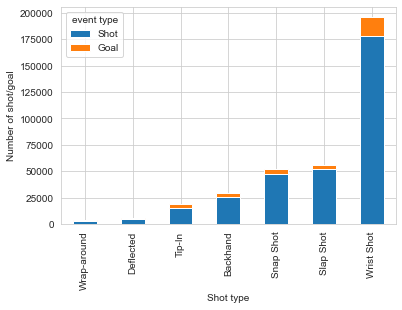

In [3]:
# create a new column indicating event type
df_game_events['event type'] = df_game_events['goal'].apply(lambda x: 'Goal' if x else 'Shot')

# pivot
df_shot_goal = df_game_events.groupby(['event type','shot type']).size().reset_index().pivot(columns='event type', index='shot type', values=0)
df_shot_goal = df_shot_goal.reindex(columns=['Shot','Goal'])
df_shot_goal.sort_values(['Shot','Goal'], ascending = [True, True], inplace=True)

# plot bar chart
df_shot_goal.plot(kind='bar', stacked=True)
plt.xlabel('Shot type')
plt.ylabel('Number of shot/goal')

# analyse sucess rate of different shot types
df_total_shot_goal = df_shot_goal['Shot']+df_shot_goal['Goal']
df_shot_goal['Total Shots'] = df_total_shot_goal
df_shot_goal['Success Rate'] = df_shot_goal['Goal']/df_total_shot_goal
df_shot_goal

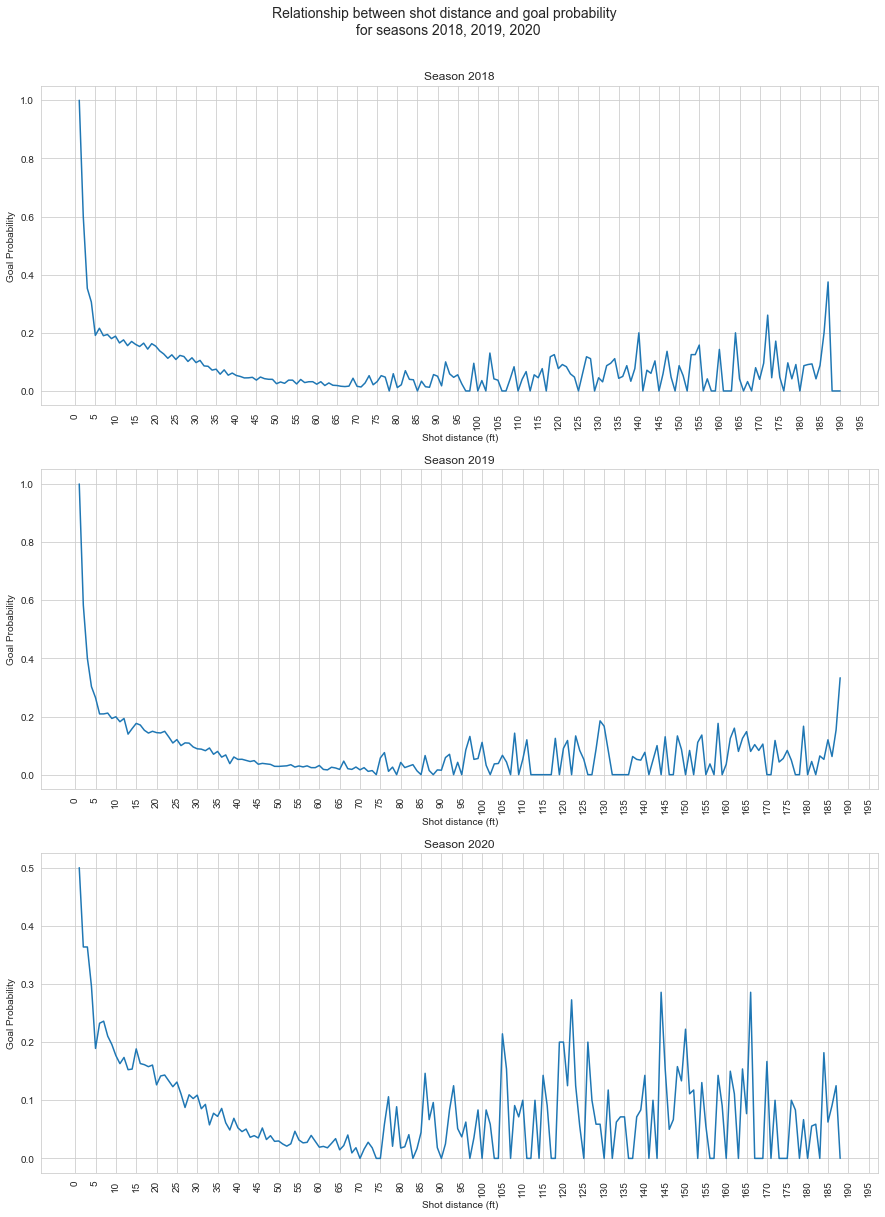

In [19]:
def distance_vs_goal(df_game_events):
    """
    """
    df_game_events['shot distance'] = df_game_events['shot distance'].round(0)
#     df_game_events =df_game_events[df_game_events['goal']==True]
    fig = plt.figure(figsize=(15, 20))
    
    for season_idx, season in enumerate(['2018','2019','2020']):
#     for season_idx, season in enumerate(['2019']):
        plt.subplot(3, 1, season_idx + 1)
        df_game_events_season = df_game_events[df_game_events['season'].astype(str)==season]
        df_game_events_season = df_game_events_season.groupby(['shot distance'])['goal'].mean().to_frame().reset_index()
        ax = sns.lineplot(x='shot distance', y='goal', data=df_game_events_season)
        plt.title(f'Season {season}')
        ax.set_axisbelow(True)
        plt.xticks(np.arange(0, 200, 5), rotation=90)
        plt.xlabel('Shot distance (ft)')
        plt.ylabel('Goal Probability')
        
    plt.suptitle('Relationship between shot distance and goal probability \n for seasons 2018, 2019, 2020', size=14,
                     y=0.935)
        
distance_vs_goal(df_game_events)

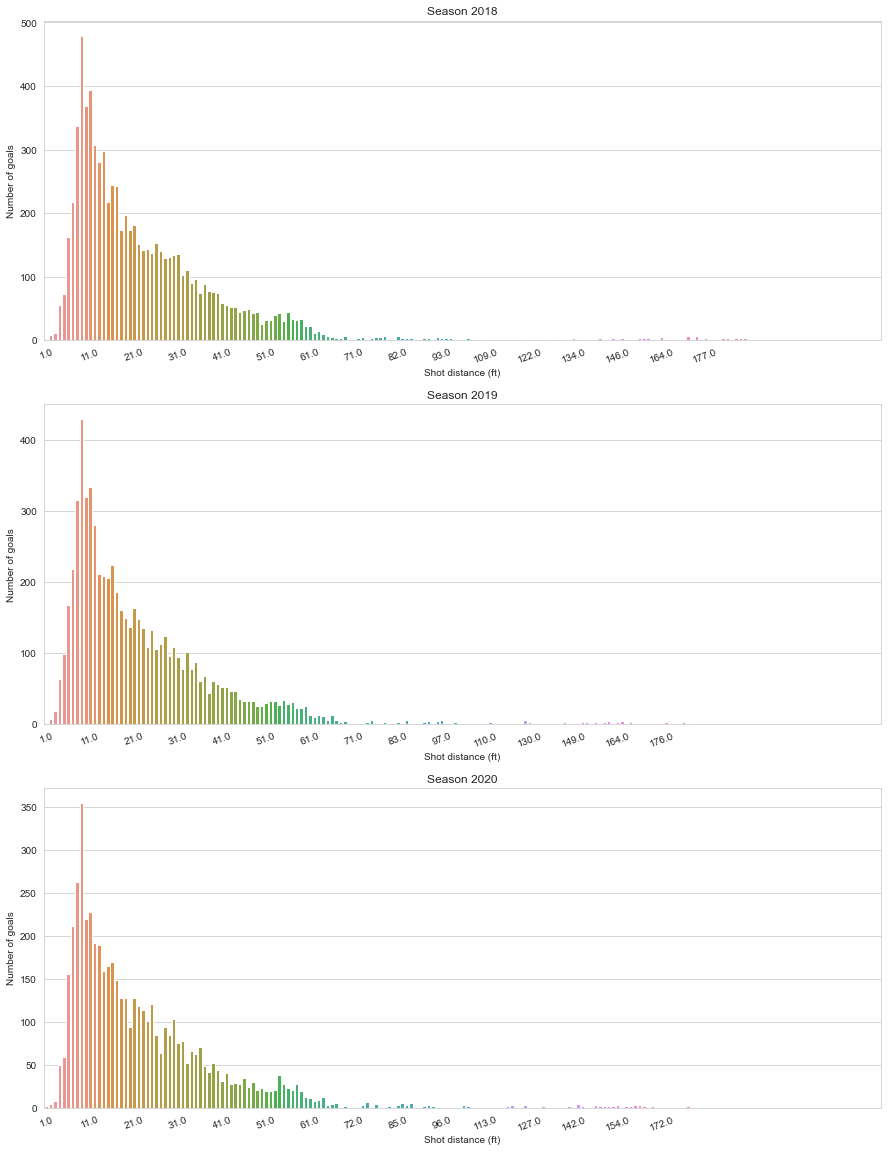

In [14]:
def shots_each_distance(df_game_events, only_count_goal=True):
    """
    """
    # remove all columns with NaN shot distance
    df_game_events = df_game_events[df_game_events['shot distance'].notna()]
    df_game_events['shot distance'] = df_game_events['shot distance'].round(0)
    
    if(only_count_goal):
        df_game_events = df_game_events[df_game_events['goal']==True]
    
    # config figure size
    fig = plt.figure(figsize=(15, 20))
    
    for season_idx, season in enumerate(['2018','2019','2020']):
#     for season_idx, season in enumerate(['2016']):
        plt.subplot(3, 1, season_idx + 1)
        df_game_events_season = df_game_events[df_game_events['season'].astype(str)==season]
        ax = sns.countplot(x=df_game_events_season['shot distance'])
        plt.title(f'Season {season}')
        ax.set_axisbelow(True)
        plt.xticks(np.arange(0, 200, 10), rotation=20)
        plt.xlabel('Shot distance (ft)')
        plt.ylabel('Number of goals')
        
shots_each_distance(df_game_events, True)